In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### **Формула Softmax**  

**Softmax** — это функция, преобразующая вектор произвольных чисел (логитов) в вектор вероятностей, где каждое значение лежит в диапазоне **(0, 1)**, а сумма всех элементов равна **1**.  

#### **Формула для одного элемента**  
Для вектора $ z = [z_1, z_2, \dots, z_K] $ softmax вычисляется как:  


$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$


где:  
- $ z_i $ — $i $-й элемент входного вектора,  
- $ K $ — размерность вектора,  
- $\sigma(z_i) $ — вероятность $ i $-го класса.  

---


In [ ]:
def softmax(vector):
  for_el = np.exp(vector)
  general_sum = np.sum( np.exp(vector) )
  return for_el / general_sum

<h2> Multinomial logistic regression</h2> — статистический метод, который используется для предсказания результатов категориальной зависимой переменной с более чем двумя категориями.  

В отличие от бинарной логистической регрессии, которая работает с двумя категориями, <b> multinomial logistic regression</b> предсказывает вероятность нескольких исходов

In [ ]:
class MultinomialLogisticRegression:

  def __init__(self, learning_rate = 0.01, n_iter = 1000):
    self.iter = n_iter
    self.lr = learning_rate
    self.weights = None
    self.bias = None


  def fit(self, X, y):
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))

    # Инициализация весов и смещений
    self.weights = np.zeros((n_classes, n_features))
    self.bias = np.zeros(n_classes)

    # One-hot кодирование y
    y_onehot = np.eye(n_classes)[y]

    # Градиентный спуск
    for _ in range(self.iter):
        # Прямой проход
        z = X @ self.weights.T + self.bias
        proba = softmax(z)

        # Обратное распространение
        grad_w = (proba - y_onehot).T @ X / n_samples
        grad_b = np.mean(proba - y_onehot, axis=0)

        # Обновление параметров
        self.weights -= self.lr * grad_w
        self.bias -= self.lr * grad_b

  def predict(self, X):
    z = X.dot(self.weights.T) + self.bias
    return np.argmax(softmax(z), axis = 1)

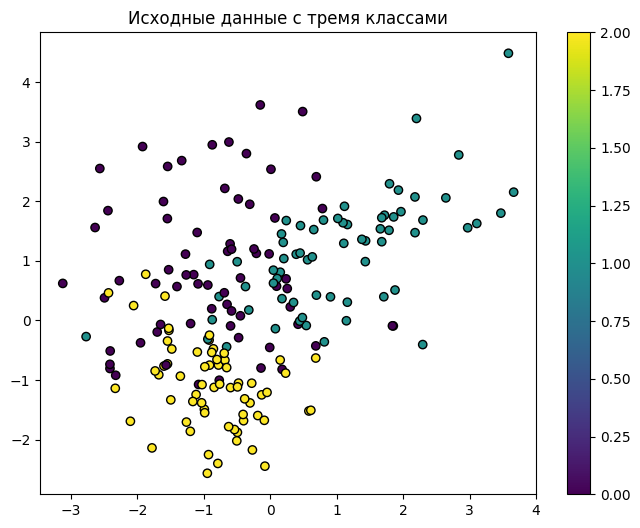

Accuracy: 0.78


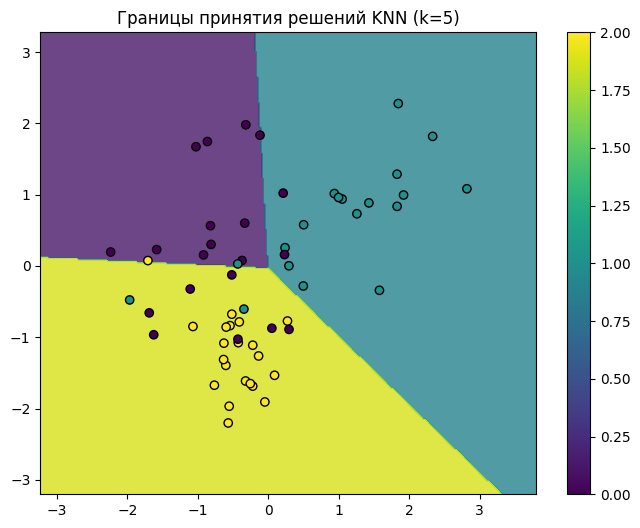

In [ ]:

# 1. Создаем синтетические данные
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=3, n_clusters_per_class=1,
                          random_state=42)

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Исходные данные с тремя классами")
plt.colorbar()
plt.show()

# 2. Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Масштабируем данные (важно для KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MultinomialLogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# 6. Оцениваем точность
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

# 7. Визуализация границ принятия решений
def plot_decision_boundaries(X, y, model, k):
    h = 0.02  # Шаг сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    for_pr = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(for_pr)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title(f"Границы принятия решений KNN (k={k})")
    plt.colorbar()
    plt.show()

plot_decision_boundaries(X_test, y_test, model, k=5)
